> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [339]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
movies_df = pd.read_csv('tmdb-movies.csv')

In [3]:
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<a id='wrangling'></a>
## Data Wrangling

> The major data part I wanna focus on are the data involving the genre of the movies, the year in which they were released, the budget, the revenue made, runtime, etc. My goal is to compare the trends and results of the movies from the last 30 years to the ones before that.

### General Properties

In [34]:
#printing out the head of the dataframe
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [31]:
#checking out the different genres involved in the dataset
genres_set = set()
for genres in movies_df.genres:
    for genre in str(genres).split('|'):
        genres_set.add(genre)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'nan'}

##### Genres
> As we can see there are a wide range of genres for a single movie itself. And also clubbing genres is not that easily possible so the study will be carried out by taking in account all the different genres. One thing we can point out is that, some of the movies do not have a genre specified. We can eliminate such movies from our analysis.

In [32]:
#checking out the budget and revenue statistics.
movies_df.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [50]:
movies_df.revenue.describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [163]:
rev_budget_ratio = movies_df.revenue/movies_df.budget
rev_budget_ratio.describe()

count    3.855000e+03
mean     2.979639e+02
std      1.644042e+04
min      2.400000e-07
25%      8.759285e-01
50%      2.119489e+00
75%      4.210158e+00
max      1.018619e+06
dtype: float64

In [166]:
movies_df[movies_df.budget<1000].budget.count()

22

###### Money data
> As it is very clear, we can see that some of the entries are missing for the budget field. However having 0 in the revenue field is acceptable as movies can come at losses too. Assuming this, we however come to another problem. That is, there are some of the movies that was produced just with a budget less that 1000. This however shows error in the data.
###### Another anomaly
> Another anomaly that I observed is that. For some of the budget revenue pair, their ratio was very odd. That is, while describing the ratio, it is observed that the max value for the ratio was very huge. This indicates that either one of the data that was provided is false.

In [51]:
movies_df.runtime.describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [118]:
movies_df[movies_df.runtime<30].describe()

count     2.000000
mean     20.500000
std       7.778175
min      15.000000
25%      17.750000
50%      20.500000
75%      23.250000
max      26.000000
Name: runtime, dtype: float64

In [121]:
movies_df[movies_df.runtime<30]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5162,24914,tt0368574,0.208637,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,NaN,Shinichiro Watanabe,NaN,...,A high school student is haunted by thoughts o...,15,Science Fiction|Animation,Studio 4Â°C,6/2/03,16,6.8,2003,1.185353e+01,5.926763e+00
8005,14813,tt0085936,0.592219,3000000,21000000,Mickey's Christmas Carol,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...,NaN,Burny Mattinson,He's back! Mickey Mouse - in his first new mot...,...,It is an adaptation of the Charles Dickens cla...,26,Family|Animation,Walt Disney Pictures,10/19/83,89,7.4,1983,6.567936e+06,4.597555e+07


###### Runtime
> As we can see there are some movies with very low runtime. We can eliminate such movies too.

In [125]:
movies_df.popularity.describe()

count    3855.000000
mean        1.191400
std         1.475002
min         0.001117
25%         0.462448
50%         0.797298
75%         1.368245
max        32.985763
Name: popularity, dtype: float64

In [67]:
blah = movies_df.groupby('runtime').mean()
blah = blah[blah.revenue>0]
blah = blah[blah.budget>0]
bb=blah.budget

In [98]:
'''
reven_gen_df = pd.DataFrame(columns=['genre', 'budge', 'revenue'])
i=0
for index, row in movies_df.iterrows():
    budget = row.budget
    revenue = row.revenue
    for genre in str(row.genres).split('|'):
        reven_gen_df.loc[i] = [genre, int(budget), int(revenue)]
        i=i+1
'''

### Data Cleaning 
> The steps taken for clearing some of the problems in the data are described one by one.

###### Inital cleaning
>Stripping off the columns, id, cast, production companies, tagline, website, plot. Because they do not come under
 the current field of study. And also the fields were null values are present, like for budget, revenue, genres, etc.

In [138]:
# Removing the unwanted columns.
movies_df = movies_df.drop(['id', 'imdb_id',
       'cast', 'homepage','tagline', 'keywords', 'overview',
       'production_companies', 'release_date',
       'budget_adj',
       'revenue_adj'], axis=1)

###### Major assumption.
>Since we came across the problem where the budget was not properly entered, that is movies with budget less than 1000 was occured. So only the movies with a budget of over 100,000 is considered for this study.


In [169]:
# Removing the rows where the budget and revenue is 0.

movies_df = movies_df[movies_df.budget>100000]

##### Another assumption.
>Since the ratio between the revenue and the budget was a bit absurd, I've decided to remove all the rows in which the ratio was above 100. Assuming that a profit of about 100 times is possible.

In [174]:
rev_budget_ratio = movies_df.revenue/movies_df.budget
movies_df = movies_df[rev_budget_ratio<100]
new_rev_budget_ratio = movies_df.revenue/movies_df.budget
new_rev_budget_ratio.describe()

count    3.794000e+03
mean     3.966928e+00
std      7.341062e+00
min      2.400000e-07
25%      8.637065e-01
50%      2.094110e+00
75%      4.096529e+00
max      9.407693e+01
dtype: float64

##### The result.
> Now we can see that the maximum ratio that occurs in our data is just over 9 times. This does not seem odd. Atleast, compared to the original data that we were looking into.

In [190]:
movies_df.head()
movies_df.to_csv('cleaned_data_final.csv', sep='\t', encoding='utf-8')
#saving the final cleaned up data to a csv file.

<a id='eda'></a>
## Exploratory Data Analysis


### 1) Do people stil like old school drama movies like they used to?
> Being in the eastern part of the world, the first thing that comes to someone's mind when they hear about English movies are the genres like, sci-fi, fantasy, and all others. But a true movie buff knows that English movies are much more than that. However, with the advent of modern technologies, it is almost as if the major money makers of the English film industry is from this genre in the present scenario. Does the data agree to this? Let's find out!
The main variables in consideration for this study are, year, genre, popularity, revenue etc.

In [233]:
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War'}

###### Some further cleaning.
> Since we are looking into movie genres that include pure drama, tha excludes every bit of unnatural plots like, action, adventure, animation, crime, horror, mystery, science fiction, war.

In [342]:
ignored_genres_drama = ['Action',
 'Adventure',
 'Animation',
 'Crime',
 'History',
 'Horror',
 'Mystery',
 'Science Fiction',
 'Thriller',
 'War']

In [343]:
def is_drama(df):
    flag = True
    for genre in str(df).split('|'):
        if(genre in ignored_genres_drama):
            flag = False
            break
    return flag

In [357]:
def plot_series_line(data):
    data.plot.line()
    plt.show()
    

In [358]:
drama_movies_df = movies_df[movies_df.genres.apply(is_drama)]

>First we group the data by year and compare the mean vote average for all the movies in that particular year. The visualisation is done below.

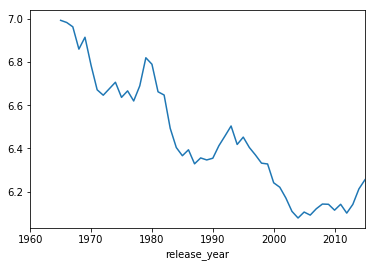

In [370]:
data = drama_movies_df.groupby('release_year').mean()['vote_average']
# rolling mean was used to distinctly identify the curve shave.
data = data.rolling(window=5, center=False).mean()
plot_series_line(data)

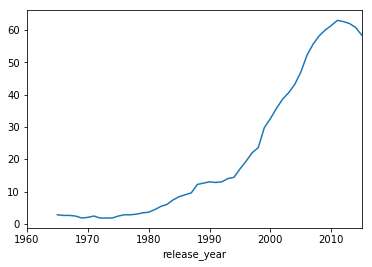

In [368]:
# The graph for the number of movies being released was also plotted to support this drop.
data = drama_movies_df.groupby('release_year').count()['revenue']
data = data.rolling(window=5, center=False).mean()
plot_series_line(data)

>This clearly shows us that the average quality of movies has decreased comparing to where the film industry stood. The increase in the number of movies being release is also another factor for this drop. The more the number of movies being released the more chances that too many bad movies come out. Another interesting observation that I made on the first graph is that, there is a particular 'U' shape for the decrease over the period, however I lack the knowledge to infer insights or explain why this is occuring.

##### So, is this the reason why?
> We have seen the drop in the mean quality of movies per year. So does this affect the popularity of drama movies?

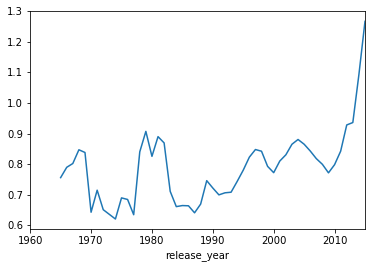

In [372]:
# checking with the popularity of Drama movies.
data = drama_movies_df.groupby('release_year').mean()['popularity']
data = data.rolling(window=5, center=False).mean()
plot_series_line(data)

###### Strange? No.
> The reason why the popularity has decreased despite the overall decrease in quality is that, as time progresses the popularity of movies as a whole increases. And this is independent of the genre. But it is clearly evident that people do not enjoy them like they did before. let us look into the mean revenue generated over the years to back this claim.

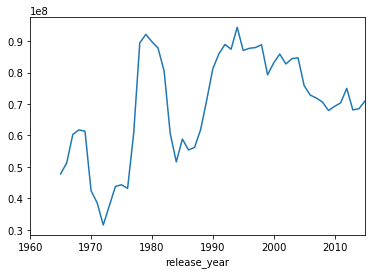

In [374]:
data = drama_movies_df.groupby('release_year').mean()['revenue']
data = data.rolling(window=5, center=False).mean()
plot_series_line(data)

> This clearly shows that the drama movies are not making an impact on the box office collections like they used to. This clearly shows that the market for drama movies are decreasing. However, do drama movies disappoint us entirely, or are there still movies that draws people?

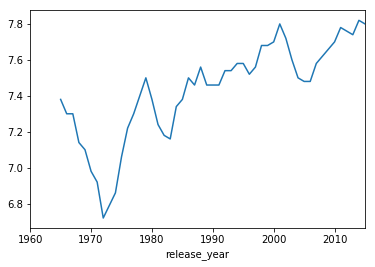

In [377]:
#finding the max vote average per year.
data = drama_movies_df.groupby('release_year').max()['vote_average']
data = data.rolling(window=5, center=False).mean()
plot_series_line(data)

##### Hopefully, a yes!
> There are still movies that amazes the viewers. This is the reason why the popularity of genre haven't dropped eventhough the mean quality of such movies have depriciated.

### In conclusion.
> No matter how many drama movies come out every year, there still will be some movies that will be worth the watch. And because of this sole reason, drama genre is far from fading.

### 2) How has modern vfx and cgi improved the market of sci-fi movies and various out of the normal plot movies?
> We identify the advent of modern CGI and vfx after Steven Speilberg's Jurrasic Park. It was indeed a spectacular sight. Since then movies started using a lot of this and its use has increased exponentially in such a way that, some critics say that it is robbing us of the reality. Good vfx and CGI are'nt the only things that make a movie great, but has the market of such out of the normal plot movies benefitted from the modern technology?
We analyse movies before the 90s and compare their statistics with the modern ones. Only the movie genres like sci-fi, horror, war, etc where this is applicable are taken into account.

In [280]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0